In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
import ast
import re

In [2]:
# Import the data 
recipe_RAW = pd.read_csv("recipe/RAW_recipes.csv")

Exploration des données du dataset utile pour l'analyse de l'effort culinaire

In [3]:
#Liste des variables du dataset 
print(recipe_RAW.columns)
print(recipe_RAW.shape)

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')
(231637, 12)


Garder les variables utiles à l'analyse : `id`, `n_ingredients`, `n_steps`, `minutes`, `steps`


In [4]:
# Garder les colonnes d'intérêt pour calculer le score d'effort culinaire
cols_of_interest = ['id', 'n_ingredients', 'ingredients', 'n_steps', 'minutes', 'steps']

In [5]:
# Sauvegarder le dataset nettoyé
recipe = recipe_RAW[cols_of_interest]
recipe.to_csv("recipe/1_recipe_cleaned.csv", index=False)

Charger le nouveau dataset

In [6]:
# Charger le nouveau dataset
recipe = pd.read_csv("recipe/1_recipe_cleaned.csv")

In [7]:
print(recipe.columns)
print(recipe.shape)

Index(['id', 'n_ingredients', 'ingredients', 'n_steps', 'minutes', 'steps'], dtype='object')
(231637, 6)


In [8]:
# On contrôle les valeurs manquantes
print("Valeurs manquantes dans les recettes par variable: \n", recipe.isna().sum())
# Il n'y a pas de valeurs manquantes dans les colonnes d'intérêt

Valeurs manquantes dans les recettes par variable: 
 id               0
n_ingredients    0
ingredients      0
n_steps          0
minutes          0
steps            0
dtype: int64


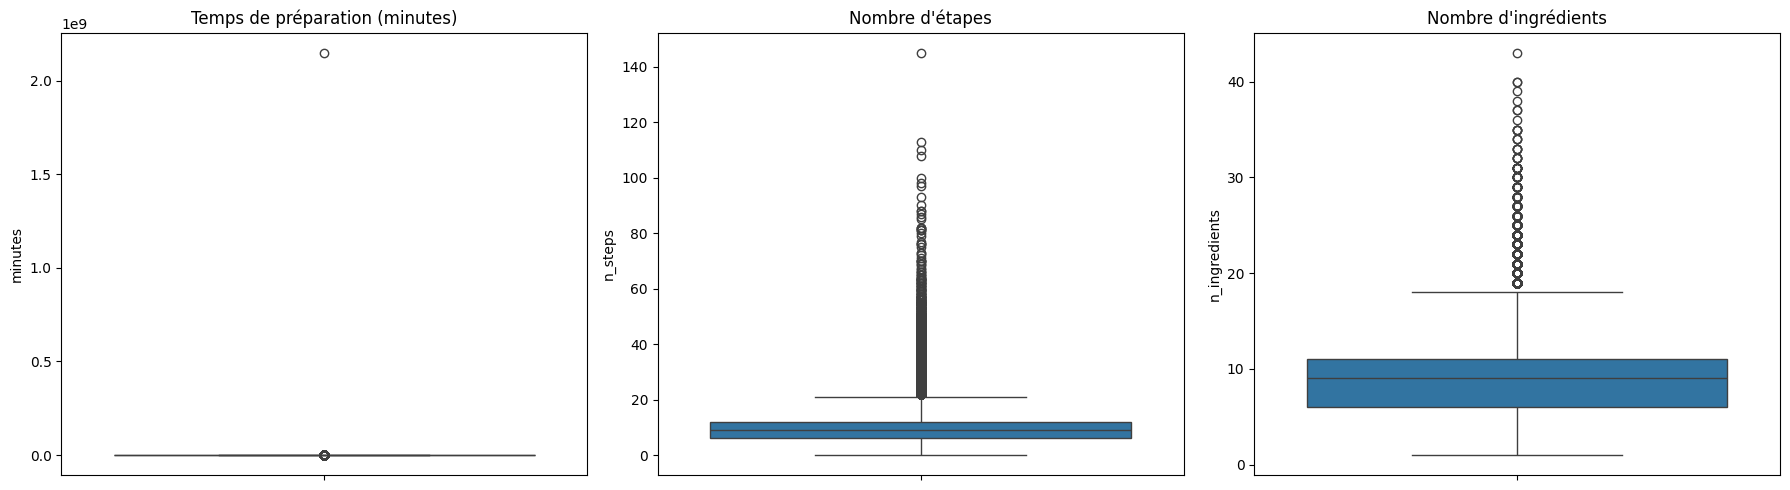

In [9]:
# On trace des boxplots pour visualiser la distribution de certaines variables numériques
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(y=recipe['minutes'], ax=axes[0])
axes[0].set_title('Temps de préparation (minutes)')
axes[0].set_ylabel('minutes')

sns.boxplot(y=recipe['n_steps'], ax=axes[1])
axes[1].set_title("Nombre d'étapes")
axes[1].set_ylabel('n_steps')

sns.boxplot(y=recipe['n_ingredients'], ax=axes[2])
axes[2].set_title("Nombre d'ingrédients")
axes[2].set_ylabel('n_ingredients')

plt.tight_layout()
plt.show()

- Il faut traiter en priorité la notion d'outliers, il y en a beaucoup pour les trois variables.